## Logistic Regression
* **Regression analysis is a set of statistical processes for estimating the relationships among variables**
* **In logistic regression, the outcome (dependent variable) is binary**

In [33]:
#Import the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [2]:
#Import the data
data = pd.read_csv("../input/insurance_data.csv")

## Exploratory Data Analysis

In [3]:
#First 5 lines of the data
data.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


In [4]:
#Basic statistics of the data
data.describe()

,age,bought_insurance
count,27.000000,27.000000
mean,39.666667,0.518519
std,15.745573,0.509175
min,18.000000,0.000000
25%,25.000000,0.000000
50%,45.000000,1.000000
75%,54.500000,1.000000
max,62.000000,1.000000


In [5]:
#Basic info about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
age                 27 non-null int64
bought_insurance    27 non-null int64
dtypes: int64(2)
memory usage: 512.0 bytes


In [6]:
#Correlation of the fields in the data
data.corr()

,age,bought_insurance
age,1.000000,0.732395
bought_insurance,0.732395,1.000000


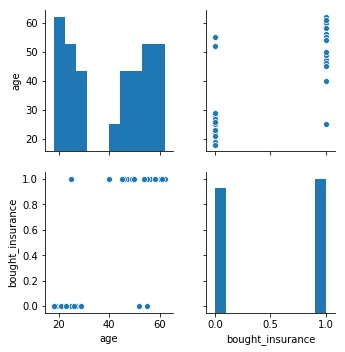

In [7]:
#Plot the relationship between the variables using pairplot
sns.pairplot(data)

## Data Pre-processing

In [8]:
#Separate Feature and Traget matrixs
x = data.iloc[:,:-1].values
y = data.iloc[:,1].values

In [9]:
#Split the train and test dataset
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

## Machine Learning

In [10]:
#Define the Machine Learning Alorithm
ml = LogisticRegression()

In [11]:
#Train the Machine Learning Algorithm (Learning)
ml.fit(x_train,y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [12]:
#Test the Machine Learning Algorithm (Prediction)
y_pred = ml.predict(x_test)

## Comparison of the Prediction Results

Text(0, 0.5, 'Bought Insurance 1=Bought 0=Did not Buy')

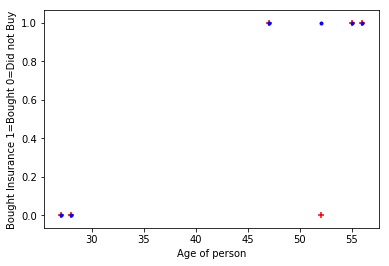

In [32]:
plt.scatter(x_test,y_test,color= 'red', marker='+')
plt.scatter(x_test,y_pred,color='blue', marker='.')
plt.xlabel("Age of person")
plt.ylabel("Bought Insurance 1=Bought 0=Did not Buy")

In [28]:
ml.score(x_test,y_test)

0.8333333333333334

Find the results [TP   FP

                  FN  TN ]

In [30]:
confusion_matrix(y_test,y_pred)

array([[2, 1],
       [0, 3]])